In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.groupby('smoker').sum()

,age,bmi,children,charges
smoker,,,,
no,41906,32613.510,1160,8.974061e+06
yes,10553,8414.115,305,8.781764e+06


C:\Users\E\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


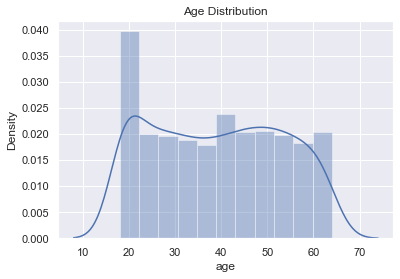

In [7]:
sns.set()
sns.distplot(df['age']);
plt.title('Age Distribution')

plt.show()

In [ ]:
print(df.groupby('sex').count())

     age  bmi  children  smoker  region  charges
sex                                             
0    676  676       676     676     676      676
1    662  662       662     662     662      662




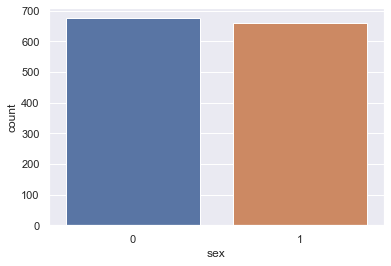

In [47]:
sns.countplot(x='sex', data=df);

#### Determining the entropy of the possible outcome

In [52]:

sex_count = df['sex'].value_counts()
smoker_count = df['smoker'].value_counts()
region_count = df['region'].value_counts()
print('Sex Count')
print(sex_count)
print('\n')
print('Smoker Count')
print(smoker_count)
print('\n')
print('Region Count')
print(region_count)

Sex Count
0    676
1    662
Name: sex, dtype: int64


Smoker Count
1    1064
0     274
Name: smoker, dtype: int64


Region Count
0    364
1    325
3    325
2    324
Name: region, dtype: int64


In [9]:
# Encoding the categorical features

df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [10]:
 df['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

In [11]:
x = df.drop(columns = 'charges', axis=1)
y = df['charges']

In [12]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [13]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [19]:
print('x shape = ', x.shape, x_train.shape, x_test.shape, '\n','y shape = ', y.shape, y_train.shape, y_test.shape)

x shape =  (1338, 6) (1070, 6) (268, 6) 
 y shape =  (1338,) (1070,) (268,)


In [20]:
regression = LinearRegression()

In [22]:
regression.fit(x_train, y_train)

LinearRegression()

In [23]:
training_data_prediction = regression.predict(x_train)

In [25]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R square value = ', r2_train)

R square value =  0.751505643411174


In [26]:
test_data_prediction = regression.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R square value = ', r2_test)

R square value =  0.7447273869684076


In [28]:
input_data = (x.iloc[1:2,:])

   age  sex    bmi  children  smoker  region
1   18    0  33.77         1       1       0


In [33]:
input_array = np.asarray(input_data)

# reshape the array
input_array_reshape = input_array.reshape(1, -1)

predct = regression.predict(input_array_reshape)
print(f'The insurance cost is : $ {predct[0]}')

The insurance cost is : $ 3701.0615780230946


### Collecting values from customers

In [45]:
age = int(input('Age: '))
sex = int(input('sex: '))  
bmi = float(input('bmi: '))
children = int(input('children: '))
smoker = int(input('smoker: '))
region = int(input('region: '))

intd = [age, sex, bmi, children, smoker, region]
print(intd)

Age:  34
sex:  1
bmi:  34
children:  2
smoker:  1
region:  1


[34, 1, 34.0, 2, 1, 1]


In [43]:
input_array = np.asarray(intd)

input_array_reshape = input_array.reshape(1, -1)

predct = regression.predict(input_array_reshape)
print(f'The insurance cost is : $ {predct[0]}')

The insurance cost is : $ 6024.281516346913
